# K-means Demo

## Import Libraries and Data Creation

In [5]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn import datasets

Then we define two variables called `cluster_1` and `cluster_2` by randomly sampling from normal distribution.  We also standardize them using `StandardScaler` of `sklearn.preprocessing`:

In [2]:
cluster_1x = np.random.normal(10, 5, 500)
cluster_1y = np.random.normal(20, 5, 500)
cluster_1 = np.concatenate([cluster_1x.reshape(-1, 1), cluster_1y.reshape(-1, 1)], axis=1)

cluster_2x = np.random.normal(30, 5, 500)
cluster_2y = np.random.normal(20, 5, 500)
cluster_2 = np.concatenate([cluster_2x.reshape(-1, 1), cluster_2y.reshape(-1, 1)], axis=1)

all_data = np.concatenate([cluster_1, cluster_2], axis=0)

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

## K-Means

To apply k-means, we use `KMeans` class from `sklearn.cluster` module. To measure the run time we use [`%timeit` magic command](https://ipython.org/ipython-doc/3/interactive/magics.html#magic-timeit) of iPython:

34.9 ms ± 488 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


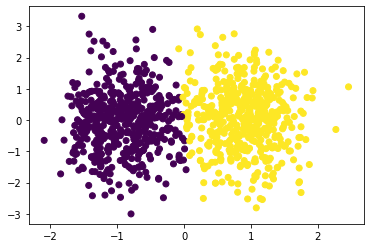

In [3]:
k_means = KMeans(n_clusters=2, random_state=123)
%timeit k_means.fit(all_data)
y_pred = k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred)
plt.show()

Clusters seem to capture the correct grouping in the data and the algorithm took around 17 milliseconds to run. Now, let's try MiniBatchKMeans for comparison:

11.9 ms ± 317 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


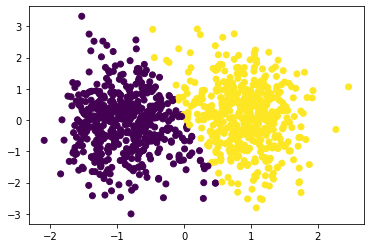

In [4]:
mini_batch_k_means = MiniBatchKMeans(n_clusters=2, random_state=123)
%timeit mini_batch_k_means.fit(all_data)
y_pred_mini = mini_batch_k_means.predict(all_data)

# Plot the solution.
plt.scatter(all_data[:,0], all_data[:,1], c=y_pred_mini)
plt.show()

MiniBatchKMeans also did a great job in less than half the time of the KMeans!

### Iris dataset

Now that we've seen k-means at work on randomly generated data, let's have a look at a real-world dataset. For this example, we'll use the famous [Iris data](https://archive.ics.uci.edu/ml/datasets/iris) from the UC Irvine Machine Learning Repository. This dataset a standard for exploring clustering and pattern recognition algorithms. It contains data on three types of iris plants, with 50 instances of each type. Among the three classes, one of them is linearly separable from the other two whereas the other two are not linearly separable from one another. 

The names of the iris plants are *Iris Setosa*, *Iris Versicolour*, and *Iris Virginica*. Each plant has four features:

1. Sepal length in cm.
2. Sepal width in cm.
3. Petal length in cm.
4. Petal width in cm.

In this example, our goal will be to create a k-means solution that correctly clusters the three types of iris plants.

Note that in this example we actually know the correct number of clusters in the data: three. But, we'll test whether k-means will assign observations as we expect it to do. Since k-means is an unsupervised learning algorithm, it will not use the information regarding the correct classes of the observations.

One important thing to keep in mind is that resulting clusters depend on the explanatory power of the variables that are fed into the clustering algorithms. In our example, the performance of k-means depends on the predictive power of the variables on identifying the plant type. So, if they are weak in this regard, then k-means won't be able to discern the correct classes.

To load the data, we'll use scikit-learn's `datasets` module. After we import the module (`from sklearn import datasets`), we load the dataset as follows: `iris = datasets.load_iris()`. 

Most of the clustering algorithms are sensitive to the scale of the data. So, before applying k-means, we also standardize our variables using the `StandardScaler` from `sklearn.preprocessing`:

In [6]:
# Loading data from Sklearn's datasets
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standardizing the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

We run k-means by setting `n_clusters=3`, since we have three classes of iris plant types in our data. The first assignment of this checkpoint asks you to play with this parameter and experiment with the results:

In [7]:
# Defining the k-means
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_std)
y_pred = kmeans_cluster.predict(X_std)

19.3 ms ± 487 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


Let's visualize the predictions and the true labels of the observations. To plot in two-dimensional space, we need to reduce our data dimensionality. For this purpose, we apply PCA and use the first two principal components.

In the plot below, the numbers show the cluster each observation has been assigned to by the algorithm. The colors denote the true classes.

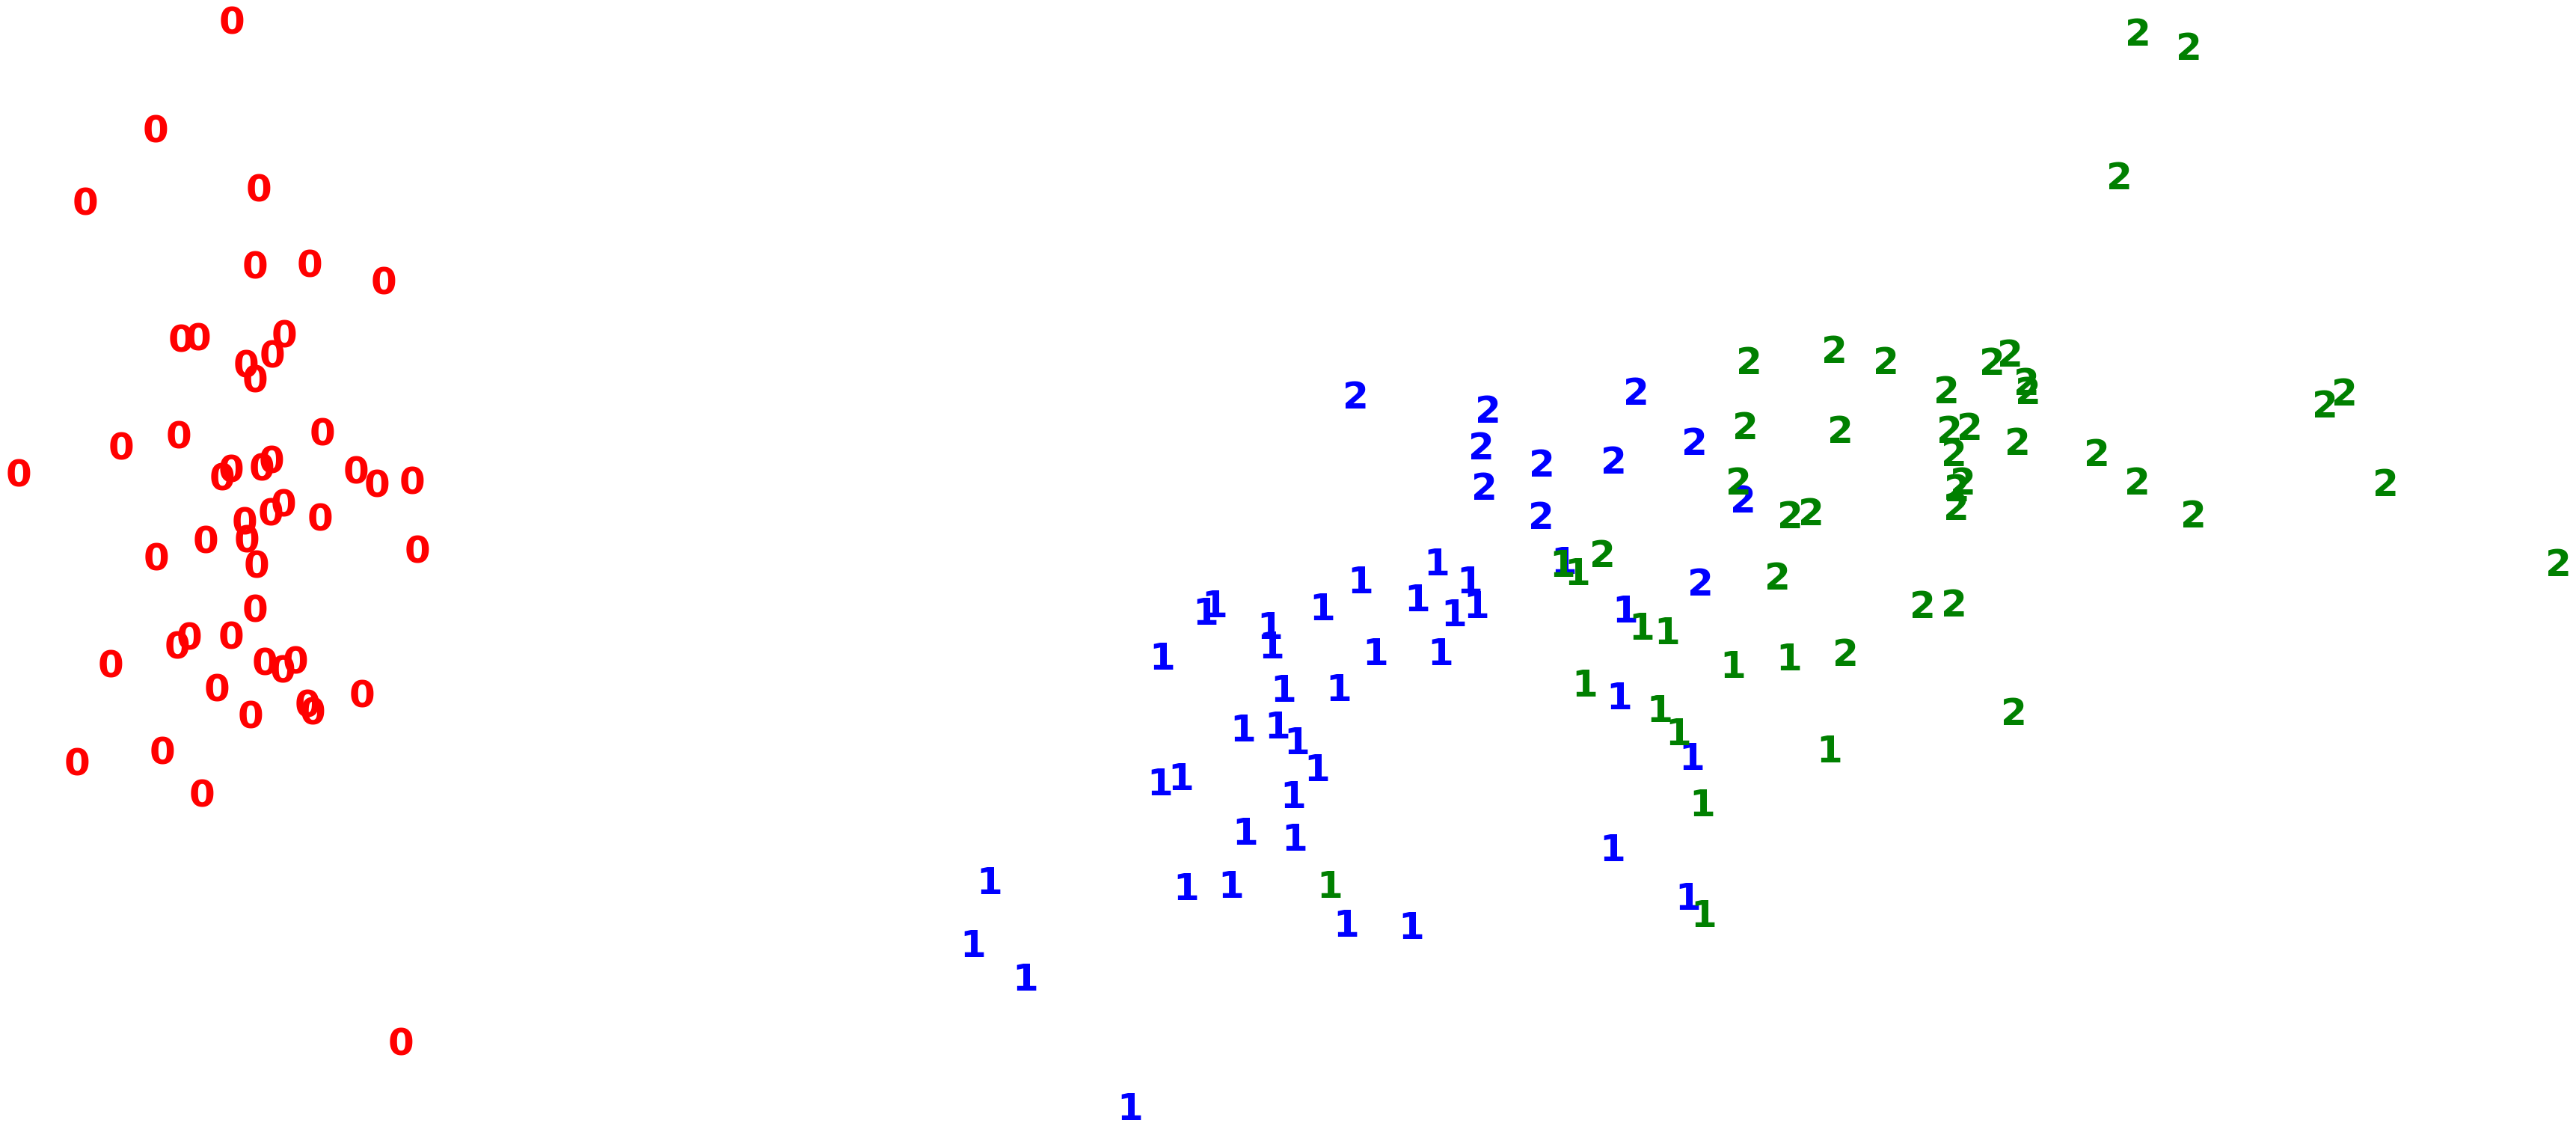

In [9]:
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Not bad! K-means seems to successfully identify the linearly separable class from the other two. However, for the inseparable two classes, the algorithm produced some incorrectly assigned predictions. 

Next, let's try mini-batch k-means:

9.48 ms ± 312 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


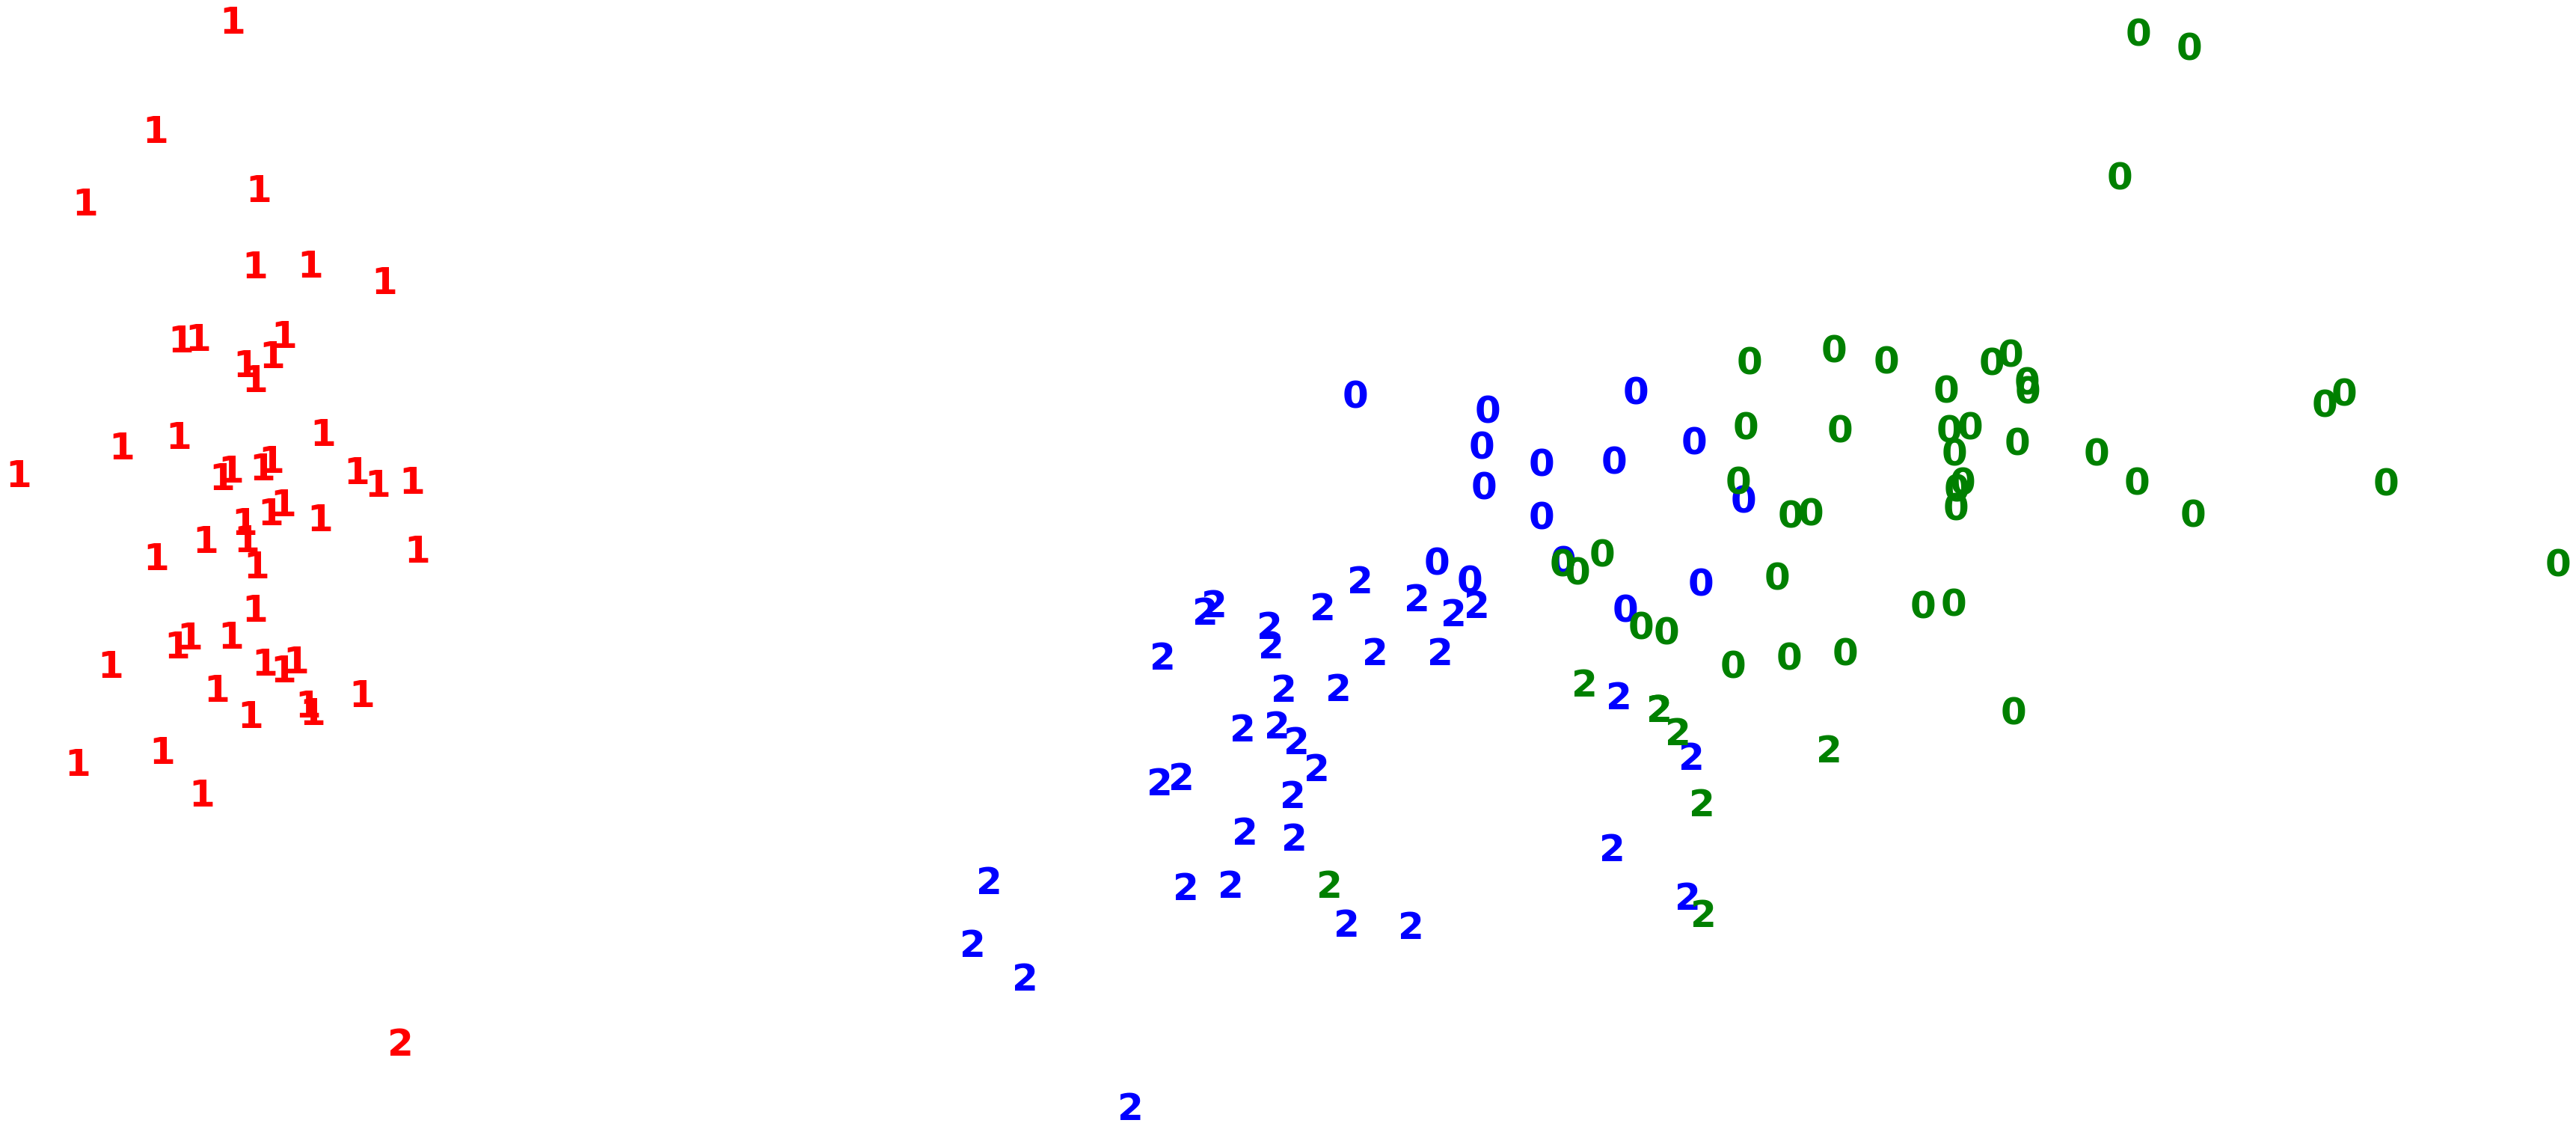

In [10]:
# Defining the mini-batch k-means
minikmeans_cluster = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=50)

# Fit model
%timeit minikmeans_cluster.fit(X_std)
minikmeans_cluster = minikmeans_cluster.predict(X_std)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(minikmeans_cluster[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Mini-batch k-means produced similar results but it was more than twice as fast.